In [6]:
import pandas as pd
df = pd.read_csv("cdc.txt", sep = " ")

# df.head()
# df.info()
# df.describe()
# df.shape

# 슬라이드에 없는 것
## 특정 변수에 대해서만 실행
# df.genhlth.head()
# ## iloc와 loc를 통해 자료를 뽑아 볼 수 있다.
# df.iloc[0,0]
# df.iloc[0:3, 3:5]
# df.loc[df.exerany == 0]

# 위 내용은 너무 길어서 방해될까봐 일부러 출력 안했습니다.

### 예제 1
예제 1. genhlth 변수에 대해 적절한 방법을 이용하여 요약해보자. 범주형 자료의 경우에는 어떠한 요약 방법을 사용할 수 있는가?

**분석**<br>
- genhlth 변수는 `very good, good, excellent, fair, poor` 다섯 가지 값을 가지는 **범주형 자료**이다. 이는 범주형 자료 중에서도 순서가 의미를 가지는 ordinal data에 해당되는데, 숫자형 자료와는 달리 사칙연산이 무의미하다. 따라서 주어진 genhlth 변수에 대해서는 범주형 자료에 대한 요약 방법을 사용하는 것이 적절하다.
- 범주형 자료의 경우에는 각 범주에 대한 빈도를 **분할표 또는 bar chart**로 요약할 수 있다. 아래는 분할표와 bar chart를 출력하는 코드이다.

  1. 분할표의 경우, 정확한 빈도를 직접적으로 확인할 수 있다. 아래는 도수를 그대로 출력하였지만, 전체에 대한 비율인 상대도수를 출력하는 방법도 가능하다. 출력에는 collections의 Counter 모듈을 사용한다.
  2. bar chart의 경우, 시각적으로 범주간 비교를 하는 데 용이하다. "very good"의 빈도가 가장 높다는 것을 한눈에 확인할 수 있다. 출력에는 matplotlib 모듈을 사용한다.

In [7]:
from collections import Counter
import matplotlib.pyplot as plt 
cg = Counter(df.genhlth)

# 분할표
print(cg)

# bar chart
cg_k = list(cg.keys())
cg_v = list(cg.values())

plt.bar(cg_k, cg_v)
plt.xlabel("genhlth")
plt.ylabel("count")
plt.title("Bar chart for genhlth", fontsize = 20)
plt.show()

Counter({'very good': 6972, 'good': 5675, 'excellent': 4657, 'fair': 2019, 'poor': 677})


<Figure size 640x480 with 1 Axes>

### 예제 2
예제 2. weight 변수에 대한 수치적 요약 값을 구해보자. 전체 응답자의 평균 몸무게는 얼마인가?

**분석**
- weight 변수는 integer로 이루어진 **숫자형 자료**이다. 위 예제 1에서 언급된 범주형 자료와 달리, 숫자형 자료는 사칙연산이 가능하다.
- 숫자형 자료에 대한 요약은 크게 두 가지로 나누어 살펴볼 수 있다.

  1. 위치의 측도는 자료의 **중심위치**를 나타내는 측도이다.
      - **평균**은 주어진 수의 합을 수의 개수로 나눈 값이다. 평균은 outlier의 영향에 취약하다는 단점이 있다. 즉 이 자료
      - **중앙값**은 "어떤 주어진 값들을 크기의 순서대로 정렬했을 때 가장 중앙에 위치하는 값"을 말한다. 평균과 달리 outlier의 영향을 잘 받지 않는다. 이 자료의 경우, 평균과 중앙값이 큰 차이를 보이지 않는다는 점에서 심각한 outlier의 영향은 없다고 볼 수 있다. 
      - **제n분위수**는 자료를 작은 것부터 크기 순으로 나열했을 때 n%에 위치한 값을 뜻한다. 중앙값은 **제 50분위수**와 같다. 이 자료는 25%에 몸무게가 140인 사람이 위치하고, 75%에 몸무게가 190인 사람이 위치하고 있음을 알 수 있다.
  2. 산포의 측도는 자료의 **흩어짐**을 나타내는 측도이다.
      - **분산**과 **표준편차**는 산포를 나타내는 대표적인 값이다. **분산**은 편차 제곱들의 평균인데, 이때 제곱으로 인해 커진 값을 다시 루트를 씌워 표준화한 것이 **표준편차**이다. 표준편차가 클수록 자료에 평균으로부터 퍼진 값들이 많고, 작을수록 평균 주위에 몰려 있다는 의미이다.
      - 또한 **최대값**과 **최소값**을 비교하여 산포를 나타낼 수 있다. 하지만 이는 극단적으로 높거나 낮은 outlier의 영향에 민감하다는 단점이 있다. 이에 사분위수범위를 대체적으로 사용하곤 한다.
      
전체 응답자의 평균 몸무게는 **169.68295**이다.

In [8]:
import numpy as np

print("평균", np.mean(df.weight))
print("중앙값", np.median(df.weight))
print("제25분위수 (제1사분위수)", np.percentile(df.weight, 25)) # n분위수
print("제75분위수 (제3사분위수)", np.percentile(df.weight, 75)) # n분위수

print("분산", np.var(df.weight))
print("표준편차", np.std(df.weight))
print("최소값", np.min(df.weight))
print("최대값", np.max(df.weight))

print("총합", np.sum(df.weight))

평균 169.68295
중앙값 165.0
제25분위수 (제1사분위수) 140.0
제75분위수 (제3사분위수) 190.0
분산 1606.4038292975206
표준편차 40.07996793034546
최소값 68
최대값 500
총합 3393659


### 예제 3
예제 3. weight 변수와 wtdesire 변수의 산점도를 그려보자. 두 변수 사이에는 어떠한 관계가 존재한다고 보여지는가? 두 변수의 상관계수는 무엇은 나타내고 있는가?

**분석**

`wtdesire`은 본인이 생각하는 이상적인 체중이며, `weight`는 실제 체중이다.

1. 산점도
  - 아래는 weight 변수와 wtdesire 변수 간 관계를 보기 위해 그린 산점도이다.
  - 두 변수 사이에 **양의 선형관계**가 존재한다고 보여진다. wtdesire가 높은 사람이 weight도 높고 반대로 wtdesire가 낮은 사람이 대체로 weight가 낮다. 즉 대체로 자기 몸무게 근처의 몸무게를 희망하는 것이다. 물론 반례가 소수 존재하지만, 대다수의 점들이 마치 양의 기울기를 가진 직선 주위에 몰려있는 모양을 띠고 있으므로 양의 선형관계가 보인다고 결론지을 수 있다. 
  
2. 상관계수
  - 두 변수의 상관계수는 0.80005213으로 역시 강한 **양의 선형관계**를 나타내고 있다. 상관계수는 -1~1 사이의 값을 가지며 부호는 관계의 방향, 절대값이 클수록 강한 선형관계를 의미한다. 양수이며 학계에서 통상적으로 강한 선형관계로 분류할 정도로 높은 절대값을 띠므로 강한 양의 선형관계라고 결론지을 수 있다.

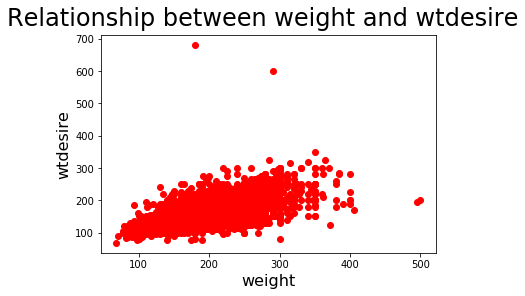

array([[1.        , 0.80005213],
       [0.80005213, 1.        ]])

In [9]:
# 산점도
fig = plt.figure()
fig.suptitle('Relationship between weight and wtdesire', fontsize = 24)
plt.xlabel('weight', fontsize = 16)
plt.ylabel('wtdesire', fontsize = 16)
plt.scatter(df.weight, df.wtdesire, color="red")
plt.show()

# 상관계수
np.corrcoef(df.weight, df.wtdesire)

### 예제 4
예제 4. wtdesire 변수와 weight 변수의 차를 계산하여 새로운 변수 wdiff 를 만들어보자. wdiff 의 분포는 어떠한가? 수치적 요약과 그래프 요약을 통해 살펴보자. 이것이 의미하는 바는 무엇인가?

**분석**

- `wdiff`는 본인이 생각하는 이상적인 체중과 실제 체중의 차이를 나타낸다. 
- wdiff의 분포를 수치적 요약을 통해 살펴보면, 평균적으로 응답자들은 14.5891 pound의 몸무게 감량을 원하고 있으며, 중앙값에 해당하는 응답자는 10 pound의 몸무게 감량을 원하고 있다. 제3사분위수가 0인 것을 보아, 체중을 감량하길 원하는 응답자가 증량하기 원하는 응답자보다 더 많음을 알 수 있다. 표준편차를 통해 상당히 wdiff가 흩어져서 분포하고 있음을 알 수 있고, 최소값/최대값은 극단적으로 크거나 작기 때문에 outlier라고 볼 수 있다.
- 이러한 분포는 히스토그램이나 상자그림 등을 통해 확인해볼 수도 있다. 히스토그램으로 확인을 해보면, 왼쪽으로 긴 꼬리를 가진 그래프의 모양과 흡사하다. 이로부터 증량을 원하는 응답자보다는 감량을 원하는 응답자가 많음을 다시 한 번 확인할 수 있다. 또한 왼쪽으로 긴 꼬리를 가졌지만 대체로 중앙에 응답이 몰려 있는 편이고, 양끝으로 갈 수록 응답자가 현저히 적어지는 양상을 띤다.

평균 -14.5891
중앙값 -10.0
제25분위수 (제1사분위수) -21.0
제75분위수 (제3사분위수) 0.0
분산 578.17426119
표준편차 24.045254442197113
최소값 -300
최대값 500


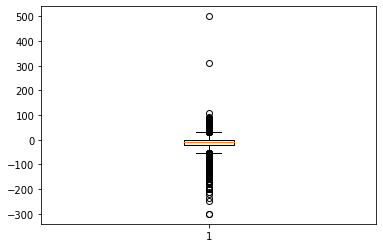

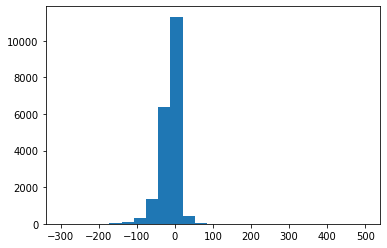

In [12]:
wdiff = [x1 - x2 for (x1, x2) in zip(df.wtdesire, df.weight)]

# 수치적 요약
print("평균", np.mean(wdiff))
print("중앙값", np.median(wdiff))
print("제25분위수 (제1사분위수)", np.percentile(wdiff, 25)) # n분위수
print("제75분위수 (제3사분위수)", np.percentile(wdiff, 75)) # n분위수

print("분산", np.var(wdiff))
print("표준편차", np.std(wdiff))
print("최소값", np.min(wdiff))
print("최대값", np.max(wdiff))

# 그래프 요약
plt.boxplot(wdiff)
plt.show()
plt.hist(wdiff, bins = 25)
plt.show()

### 예제 5
예제 5. age 변수를 이용하여 히스토그램을 그려보자. 그리고 구간의 수를 50, 100으로 바꿔가며 동일한 히스토그램을 그린 후 비교해보자.

**분석**
- 히스토그램은 자료의 형태를 한눈에 파악하기 쉬운 방법이다. 20~50세 응답자가 많으며 그보다 높은 나이는 높을수록 응답자의 수가 적음을 한눈에 파악할 수 있다. 
- 구간의 수를 바꿔가며 동일한 히스토그램을 그린 결과, 동일한 자료에 대해 히스토그램을 그려도 구간을 어떻게 나누는가에 따라 그 모양이 조금씩 달라짐을 알 수 있다.

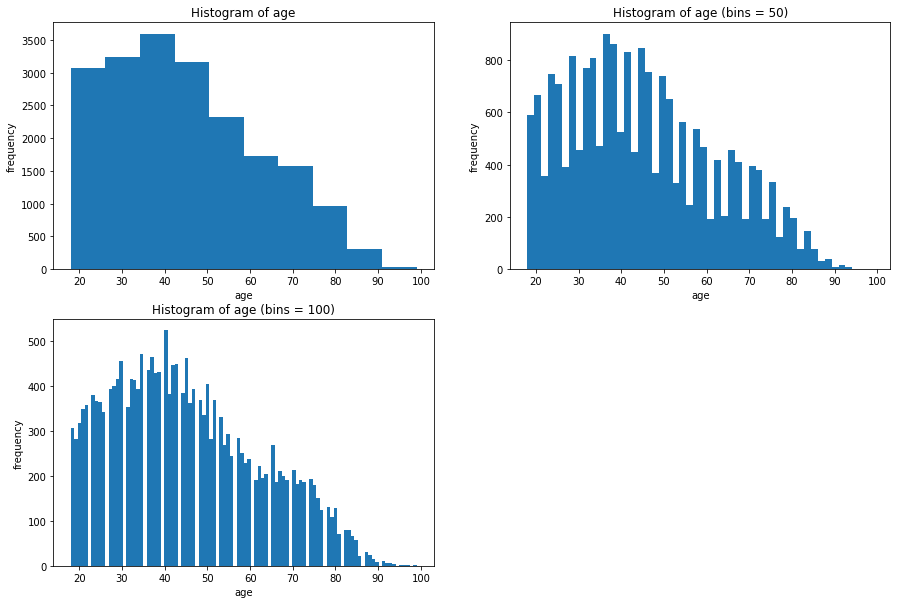

In [13]:
plt.figure( figsize=(15,10))

# default
plt.subplot(2,2,1)
plt.hist(df.age)

plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Histogram of age')

# 50
plt.subplot(2,2,2)
plt.hist(df.age, bins = 50)

plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Histogram of age (bins = 50)')

# 100
plt.subplot(2,2,3)
plt.hist(df.age, bins = 100)

plt.xlabel('age') 
plt.ylabel('frequency') 
plt.title('Histogram of age (bins = 100)')

plt.show()